# Project Details

the tasks in this project are as follows:

Data wragling which consists of :
1. Gathering data (download file and Twitter API)
2. Assessing data
3. Cleaning data
4. Sorting , analysizing and visualizing the wragled data
5. Reporting 


## Loading Data

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import os 
import json
import time
import matplotlib.pyplot as plt
%matplotlib inline
from twitter_api import get_twitter_data

## Gathering

In [2]:
### Twitter Archive
df_arch = pd.read_csv('twitter-archive-enhanced.csv')

### Image prediction

In [3]:
# Download image predictions file from URL programaticly.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open ('image-predictions.tsv' , mode = 'wb') as file:
    file.write(response.content)
    
# Reading TSV file
df_pred = pd.read_csv('image-predictions.tsv', sep ='\t')

### Twitter API

In [4]:
# download data from twitter API
if not os.path.exists('tweet_json.txt'):
    get_twitter_data(df_arch,'tweet_json.txt')

In [5]:
# load tweets data into pandas df
with open('tweet_json.txt') as file:
    df_api = pd.read_json(file , lines = True, encoding = 'utf-8')

## Assessing

#### inspecting the dataset for two things: data quality issues(ex: content issues) and lack of tidiness (ex: structure isuues)

### Twitter Archive

In [6]:
df_arch.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1031,745422732645535745,NaN,NaN,2016-06-22 01:06:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745422732...,9,10,very,None,None,None,None
1078,739485634323156992,NaN,NaN,2016-06-05 15:54:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kyle. He's a heavy drinker and an avid...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739485634...,6,10,Kyle,None,None,None,None
765,777885040357281792,NaN,NaN,2016-09-19 15:00:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wesley. He's clearly trespassing. Seem...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/777885040...,3,10,Wesley,None,None,None,None
831,768609597686943744,NaN,NaN,2016-08-25 00:43:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lou. His sweater is too small and he a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768609597...,10,10,Lou,None,None,None,None
1647,683828599284170753,NaN,NaN,2016-01-04 01:53:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Breathtaking pupper here. Should be on the cov...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683828599...,12,10,None,None,None,pupper,None
1133,728751179681943552,NaN,NaN,2016-05-07 00:59:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Flurpson. He can't believe it's not bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728751179...,10,10,Flurpson,None,None,None,None
1260,710269109699739648,NaN,NaN,2016-03-17 00:58:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The squad is back for St. Patrick's Day! ☘ 💚\n...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710269109...,13,10,None,None,None,None,None
1055,742385895052087300,NaN,NaN,2016-06-13 15:59:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phil. That's his comfort stick. He hol...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742385895...,11,10,Phil,None,None,None,None
1769,678380236862578688,NaN,NaN,2015-12-20 01:03:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Crumpet. He underestimated the snow. Q...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678380236...,10,10,Crumpet,None,None,None,None
643,793195938047070209,NaN,NaN,2016-10-31 21:00:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lily. She's pupset that her costu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793195938...,12,10,Lily,None,None,None,puppo


In [7]:
df_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
df_arch.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [9]:
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
df_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
# checking for duplicated values
df_arch.duplicated().sum()

0

In [12]:
df_arch['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [13]:
df_arch['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [14]:
# Sort by rating_denominator value
df_arch.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [15]:
df_arch['rating_denominator'].describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [16]:
df_arch['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [17]:
df_arch.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [18]:
df_arch['rating_numerator'].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [19]:
# Check if there are any records in df_arch which are retweets
len(df_arch[df_arch.retweeted_status_id.isnull() == False])

181

### Observation

### QUALITY

- Remove retweets.
- some column need datatype conversion.
- There are many columns in this dataframe making it hard to read, and some will not be needed for analysis.
- The numerator and denominator columns have invalid values.
- "source" values are formated as < a> href=url < a/>
    Extract tweet source from source column and convert it to categorical.
- Timestamp and retweeted_status_timestamp are object type instead of datetime.
- Columns (doggo, floofer, pupper, puppo) has None for missing values.


### Tidiness

- doggo, floofer, pupper, puppo columns are all about the same things, a kind of dog personality.


### assessing Image prediction

In [20]:
df_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1136,728760639972315136,https://pbs.twimg.com/media/Ch0T71OWMAA4yIw.jpg,1,Pembroke,0.939134,True,Cardigan,0.054336,True,Chihuahua,0.005590,True
1277,750086836815486976,https://pbs.twimg.com/media/Cmf5WLGWYAAcmRw.jpg,1,pug,0.978277,True,teddy,0.003134,False,Brabancon_griffon,0.003061,True
1416,771136648247640064,https://pbs.twimg.com/media/CrOgsIBWYAA8Dtb.jpg,1,bathtub,0.368660,False,golden_retriever,0.297402,True,tub,0.201711,False
1887,847971574464610304,https://pbs.twimg.com/media/C8SZH1EWAAAIRRF.jpg,1,coffee_mug,0.633652,False,cup,0.273392,False,toilet_tissue,0.066656,False
1918,855459453768019968,https://pbs.twimg.com/media/C98z1ZAXsAEIFFn.jpg,2,Blenheim_spaniel,0.389513,True,Pekinese,0.188220,True,Japanese_spaniel,0.082628,True
1070,716285507865542656,https://pbs.twimg.com/media/CfDB3aJXEAAEZNv.jpg,1,Yorkshire_terrier,0.430420,True,silky_terrier,0.196769,True,cairn,0.072676,True
339,672245253877968896,https://pbs.twimg.com/media/CVRLfeoW4AA_ldZ.jpg,1,Chihuahua,0.718944,True,badger,0.178546,False,toy_terrier,0.037103,True
1587,798209839306514432,https://pbs.twimg.com/media/CxPPnCYWIAAo_ao.jpg,1,Pekinese,0.524583,True,Shih-Tzu,0.102931,True,Pomeranian,0.097893,True
1251,747933425676525569,https://pbs.twimg.com/media/CmExV2qWkAAn_pN.jpg,1,Samoyed,0.998201,True,Eskimo_dog,0.000793,True,Great_Pyrenees,0.000296,True
1795,831315979191906304,https://pbs.twimg.com/media/C4lst0bXAAE6MP8.jpg,4,briard,0.982755,True,soft-coated_wheaten_terrier,0.009084,True,Bouvier_des_Flandres,0.004693,True


In [21]:
df_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
df_pred.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [23]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
df_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [25]:
df_pred.duplicated().sum()

0

In [26]:
df_pred.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [27]:
df_pred.jpg_url.duplicated().sum()

66

### Observation for image prediction file

### QUALITY

- Drop duplicates values.
- The tweet_id column should be dtype object instead of int64.
- column names can be improved.
- Delete columns that won't be used for analysis


### tidiness

- no need to "img_num" column.




### assessing df_json

In [28]:
df_api.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [29]:
df_api.tail()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
2326,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2327,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2328,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2329,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2330,2015-11-15 22:32:08+00:00,666020888022790149,666020888022790144,Here we have a Japanese Irish Setter. Lost eye...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [30]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2331 non-null   datetime64[ns, UTC]
 1   id                             2331 non-null   int64              
 2   id_str                         2331 non-null   int64              
 3   full_text                      2331 non-null   object             
 4   truncated                      2331 non-null   bool               
 5   display_text_range             2331 non-null   object             
 6   entities                       2331 non-null   object             
 7   extended_entities              2059 non-null   object             
 8   source                         2331 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [31]:
df_api.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.331000e+03,2.331000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,0.0,0.0,0.0,2331.000000,2331.000000,2197.0,2197.0,2.600000e+01,2.600000e+01
mean,7.419079e+17,7.419079e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,NaN,NaN,NaN,2604.325182,7337.756757,0.0,0.0,8.113972e+17,8.113972e+17
std,6.823170e+16,6.823170e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,NaN,NaN,NaN,4405.721253,11396.236177,0.0,0.0,6.295843e+16,6.295843e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,1.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.782670e+17,6.782670e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,NaN,NaN,NaN,528.500000,1275.500000,0.0,0.0,7.761338e+17,7.761338e+17
50%,7.182469e+17,7.182469e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1216.000000,3185.000000,0.0,0.0,8.281173e+17,8.281173e+17
75%,7.986692e+17,7.986692e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3021.500000,8976.500000,0.0,0.0,8.637581e+17,8.637581e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,74788.000000,151123.000000,0.0,0.0,8.860534e+17,8.860534e+17


### Observation for API Tweet

### Quality

- we need Just 3 columns id, retweet_count, favorite_count


### Tidiness

- rename id column to tweet_id 

##### All datasets should be combined into 1 dataset only

_________________________________________________________________________
_________________________________________________________________________

## Cleaning

### Making a copy from data

In [32]:
archive_clean = df_arch.copy()
pred_clean = df_pred.copy()
api_clean = df_api.copy()

### Twitter Archive

#### Define

- remove retweets , there are 181 retweeted tweets.

#### Code

In [33]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

#### Test

In [34]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

#### Define

- change the dtype of column tweet_id to object


#### Code

In [35]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype('str')

#### Test

In [36]:
archive_clean.tweet_id.dtype

dtype('O')

#### Define

- Convert timestamp columns to date

#### Code

In [37]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)
archive_clean.retweeted_status_timestamp = pd.to_datetime(archive_clean.retweeted_status_timestamp)

#### Test

In [38]:
archive_clean.timestamp.dtype

datetime64[ns, UTC]

In [39]:
archive_clean.retweeted_status_timestamp.dtype

dtype('<M8[ns]')

#### Define

- Remove columns not needed

#### code

In [40]:
archive_clean = archive_clean.drop(['in_reply_to_status_id',
                                   'in_reply_to_user_id',
                                    'retweeted_status_id',
                                    'retweeted_status_user_id', 
                                     'retweeted_status_timestamp',
                                     'expanded_urls'], 1)

#### Test

In [41]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 203.9+ KB


#### Define
- Remove values other than 10 for rating_denominator

#### code

In [42]:
archive_clean = archive_clean[archive_clean['rating_denominator'] == 10]

#### Test

In [43]:
archive_clean[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2153.000000,2153.0
mean,12.250813,10.0
std,42.679419,0.0
min,0.000000,10.0
25%,10.000000,10.0
50%,11.000000,10.0
75%,12.000000,10.0
max,1776.000000,10.0


#### Define

- Extract tweet source from source column

#### code

In [44]:
def fix_source(x):
    'x is an html string from the source column in df_arch_cleaned dataset'
    #find the first closed  tag >
    i= x.find('>') + 1
    # find the first open tag after the previous <
    j =x[i:].find('<')
    # extract the text in between
    return x[i:][:j]

In [45]:
archive_clean.source = archive_clean.source.apply(lambda x: fix_source(x)).astype('category')

#### Test

In [46]:
# check for the unique values
archive_clean.source.unique()

['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene', 'TweetDeck']
Categories (4, object): ['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene', 'TweetDeck']

#### Define

- Create the "dog_stage" column by combining columns "doggo", "floofer", "pupper" and "puppo"

#### Code

In [47]:
# a function fix_source which extract the strings between tags
def dog_stage(row):
    stage = []
    if row['doggo'] == 'doggo':
        stage.append('doggo')
    if row['floofer'] == 'floofer':
        stage.append('floofer')
    if row['pupper'] == 'pupper':
        stage.append('pupper')
    if row['puppo'] == 'puppo':
        stage.append('puppo')
    
    if not stage:
        return ''
    else:
        return ','.join(stage)
    
archive_clean['dog_stage'] = archive_clean.apply(lambda row: dog_stage(row), axis=1)

In [48]:
# replace the empty string with nan and change datatype to category
archive_clean.dog_stage = archive_clean.dog_stage.replace('', np.nan).astype('category')

In [49]:
# drop the columns
archive_clean.drop(["doggo", "floofer", "pupper", "puppo"], axis=1, inplace=True)

#### Test

In [50]:
archive_clean.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
416,822610361945911296,2017-01-21 01:02:48+00:00,Twitter for iPhone,Please stop sending in non-canines like this V...,12,10,None,NaN
1914,674330906434379776,2015-12-08 20:53:11+00:00,Twitter for iPhone,13/10\n@ABC7,13,10,None,NaN
1512,691321916024623104,2016-01-24 18:09:23+00:00,Twitter for iPhone,This is Molly. She's a Peruvian Niddlewog. Lov...,11,10,Molly,NaN
1243,711968124745228288,2016-03-21 17:30:03+00:00,Twitter for iPhone,Meet Winston. He's trapped in a cup of coffee....,10,10,Winston,pupper
2189,668967877119254528,2015-11-24 01:42:25+00:00,Twitter for iPhone,12/10 good shit Bubka\n@wane15,12,10,None,NaN


In [51]:
archive_clean.dog_stage.value_counts()

pupper           224
doggo             75
puppo             24
doggo,pupper      10
floofer            9
doggo,floofer      1
doggo,puppo        1
Name: dog_stage, dtype: int64

In [52]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2153 non-null   object             
 1   timestamp           2153 non-null   datetime64[ns, UTC]
 2   source              2153 non-null   category           
 3   text                2153 non-null   object             
 4   rating_numerator    2153 non-null   int64              
 5   rating_denominator  2153 non-null   int64              
 6   name                2153 non-null   object             
 7   dog_stage           344 non-null    category           
dtypes: category(2), datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 122.5+ KB


## Image Prediction

#### Define

- remove duplicated values

#### code

In [53]:
pred_clean = pred_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#### Test

In [54]:
sum(pred_clean['jpg_url'].duplicated())

0

#### Define 

- change dtype of tweet_id column to object

#### code

In [55]:
pred_clean['tweet_id'] = pred_clean['tweet_id'].astype('str')

#### Test

In [56]:
pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2009 non-null   object 
 1   jpg_url   2009 non-null   object 
 2   img_num   2009 non-null   int64  
 3   p1        2009 non-null   object 
 4   p1_conf   2009 non-null   float64
 5   p1_dog    2009 non-null   bool   
 6   p2        2009 non-null   object 
 7   p2_conf   2009 non-null   float64
 8   p2_dog    2009 non-null   bool   
 9   p3        2009 non-null   object 
 10  p3_conf   2009 non-null   float64
 11  p3_dog    2009 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


#### Define

- Delete columns won't need in analysis.

#### Code

In [57]:
pred_clean = pred_clean.drop(['img_num'],1)

#### Test

In [58]:
pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2009 non-null   object 
 1   jpg_url   2009 non-null   object 
 2   p1        2009 non-null   object 
 3   p1_conf   2009 non-null   float64
 4   p1_dog    2009 non-null   bool   
 5   p2        2009 non-null   object 
 6   p2_conf   2009 non-null   float64
 7   p2_dog    2009 non-null   bool   
 8   p3        2009 non-null   object 
 9   p3_conf   2009 non-null   float64
 10  p3_dog    2009 non-null   bool   
dtypes: bool(3), float64(3), object(5)
memory usage: 147.1+ KB


## Twitter Api

#### Define

- we need Just 3 columns id, retweet_count, favorite_count

#### code

In [59]:
json_clean = pd.DataFrame(api_clean, columns=["id", "retweet_count", "favorite_count"])

#### Test

In [60]:
json_clean.head()

,id,retweet_count,favorite_count
0,892420643555336193,7409,35144
1,892177421306343426,5515,30408
2,891815181378084864,3639,22860
3,891689557279858688,7588,38416
4,891327558926688256,8162,36676


### Define

- Rename id column to tweet_id

### code

In [61]:
json_clean.rename(columns = {'id':'tweet_id'}, inplace=True)

### Test

In [62]:
json_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7409,35144
1,892177421306343426,5515,30408
2,891815181378084864,3639,22860
3,891689557279858688,7588,38416
4,891327558926688256,8162,36676


#### Define

- change dtype of tweet_id column to object

#### Code

In [63]:
json_clean['tweet_id'] = json_clean['tweet_id'].astype('str')

#### Test

In [64]:
json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   object
 1   retweet_count   2331 non-null   int64 
 2   favorite_count  2331 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


### merge the three files in one file 

#### Code

In [65]:
# create a new datafram that merge archive_clean with pred_clean
df_twitter = pd.merge(archive_clean, pred_clean,
                     how = 'left', on = ['tweet_id'])

In [66]:
#keep rows that have picture (jpg_url)
df_twitter = df_twitter[df_twitter['jpg_url'].notnull()]

#### Test

In [67]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1910 entries, 0 to 2152
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1910 non-null   object             
 1   timestamp           1910 non-null   datetime64[ns, UTC]
 2   source              1910 non-null   category           
 3   text                1910 non-null   object             
 4   rating_numerator    1910 non-null   int64              
 5   rating_denominator  1910 non-null   int64              
 6   name                1910 non-null   object             
 7   dog_stage           295 non-null    category           
 8   jpg_url             1910 non-null   object             
 9   p1                  1910 non-null   object             
 10  p1_conf             1910 non-null   float64            
 11  p1_dog              1910 non-null   object             
 12  p2                  1910 non-null 

#### Define 

- create a new dataframe that merge df_twitter and json_clean


#### code

In [68]:
twitter_master = pd.merge(df_twitter, json_clean, 
                      how = 'left', on = ['tweet_id'])

In [69]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1910 entries, 0 to 1909
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1910 non-null   object             
 1   timestamp           1910 non-null   datetime64[ns, UTC]
 2   source              1910 non-null   category           
 3   text                1910 non-null   object             
 4   rating_numerator    1910 non-null   int64              
 5   rating_denominator  1910 non-null   int64              
 6   name                1910 non-null   object             
 7   dog_stage           295 non-null    category           
 8   jpg_url             1910 non-null   object             
 9   p1                  1910 non-null   object             
 10  p1_conf             1910 non-null   float64            
 11  p1_dog              1910 non-null   object             
 12  p2                  1910 non-null 

In [70]:
twitter_master.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7409.0,35144.0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5515.0,30408.0
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3639.0,22860.0
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7588.0,38416.0
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8162.0,36676.0


#### Define

- save the final dataframe to twitter_archive_master.csv

#### Code

In [71]:
twitter_master.to_csv('twitter_archive_master.csv',  index=False)

## Visulalization

### rating distribution by ploting a bar chart

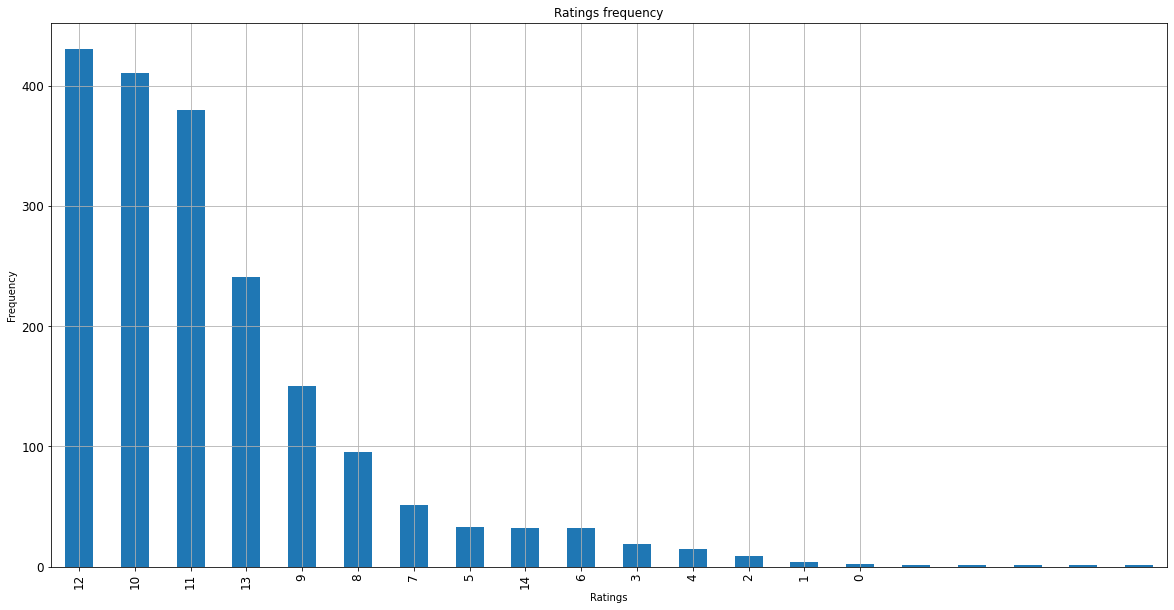

In [72]:
data = twitter_master['rating_numerator'].value_counts()

data.plot(kind='bar', figsize=(20,10),grid=True, fontsize =12,
             title = 'Ratings frequency')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.xticks(np.arange(15))


plt.show()


### Most sources used

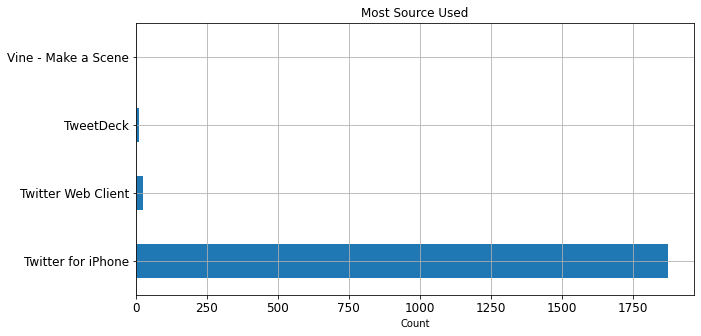

In [73]:
data2 = twitter_master['source'].value_counts()

data2.plot(kind='barh', figsize=(10,5),grid=True, fontsize =12,
        title = 'Most Source Used').set_xlabel('Count')


plt.show()



### compare dog stages

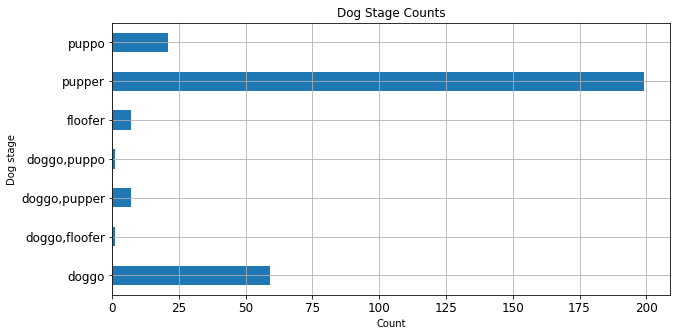

In [74]:
data = twitter_master.groupby('dog_stage').count()['tweet_id']

data.plot(kind='barh', figsize=(10,5),grid=True, fontsize =12,
             title = 'Dog Stage Counts')
plt.xlabel('Count')
plt.ylabel('Dog stage')

plt.show()

#### So the most common stage is pupper

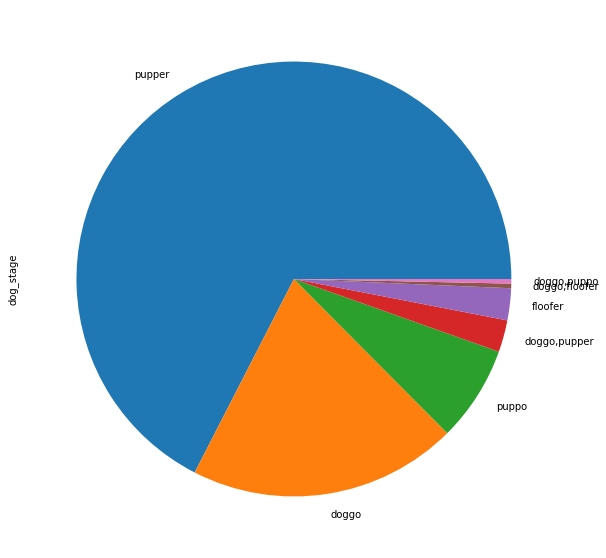

In [75]:
data = twitter_master.dog_stage.value_counts()

data.plot.pie(figsize=(10, 10))

plt.show()

#### Retweet Counts by Ratings Scatter Plot

Text(0.5, 1.0, 'Retweet Counts by Ratings Scatter Plot')

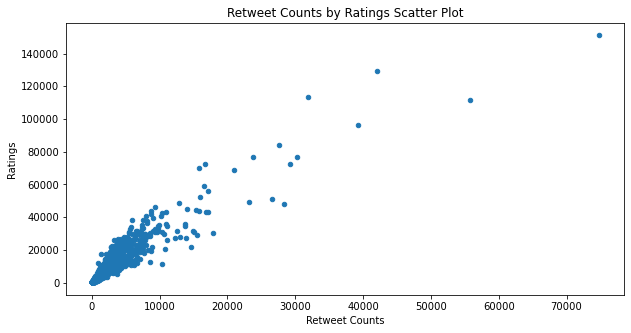

In [76]:
#The highest ratings do not receive the most retweets.

twitter_master.plot(kind='scatter',x='retweet_count', y='favorite_count',figsize=(10, 5))
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings Scatter Plot')